In [1]:
import pandas as pd
import numpy as np
import random
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
#matplotlib.rc('font',**{'family':'serif','serif':['Times']})
#plt.rc('text', usetex=True)

import glob 
import os 

In [38]:
def fit(infile):
    """
    Parameters
    ----------
    infile : path to the file with x, y, dy, data to fit

    Returns
    -------
    None.

    """
    # Loading data
    y_data, x_data, dy_data, dx_data = np.loadtxt(infile, unpack=True)
    
    # Define fit function (for curve_fit)
    def linear_fit(x, a, b):    
        return a * x + b
    
    param0 = [0, 0] 
    popt, pcov = curve_fit(linear_fit, x_data, y_data, param0, sigma=dy_data)
    
    # Best fit parameters 
    a, b = popt
    da, db = np.sqrt(pcov.diagonal())
    
    # Chi2 Test
    chi2 = sum(((y_data - linear_fit(x_data, *popt)) / dy_data)**2)
    dof = len(x_data) - len(param0)
    pvalue = 1 - stats.chi2.cdf(chi2, dof) 
    
    '''
    # PRINT RESULTS:
    print("###################################\n")
    print("file: "+infile+"\n")
    print(f'a   {a:12.3f} +/- {da:.3f}')
    print(f'b   {b:12.3f} +/- {db:.3f}')
    print(f'chi2      {chi2:12.3f}')
    print(f'dof              {dof}')
    print(f'pvalue  {pvalue:12.3f}')
    print("###################################")
    '''

    # PLOT
    # Remove extension filename
    infile = os.path.splitext(infile)[0]
    
    fig = plt.figure(infile, figsize=(10,6))
    ax = plt.axes()
    ax.errorbar(x_data, y_data, xerr= dx_data, yerr=dy_data, linestyle='', color='black', marker='o', label='data')
    xfit = np.linspace(min(x_data), max(x_data), 100)
    ax.plot(xfit, linear_fit(xfit, *popt), '--', color="red", label=r'$f_{fit}(x)$ = $ax + b$')
    # Bellurie 
    ax.set_title(infile, fontsize=16)
    ax.set_ylabel(r'$Trigger$ $value$ [mV]', fontsize=16)
    ax.set_xlabel(r'$DRS$ $Amplitude$ [mV]', fontsize=16)
    ax.minorticks_on()
    ax.grid()
    ax.plot([],[], color="white", marker=".", linestyle="None", label=f"a  {a:13.2f} $\pm$ {da:.2f}")
    ax.plot([],[], color="white", marker=".", linestyle="None", label=f"b  {b:13.2f} $\pm$ {db:.2f}")
    ax.plot([],[], color="white", marker=".", linestyle="None", label=f"$\chi^2$  {chi2:13.2f} / {dof}")
    ax.legend(frameon=False, fancybox=True, loc='best', prop={"size":15}, numpoints = 1)
    plt.savefig("FIGURES/07ottobre/"+os.path.basename(infile)+'.pdf', bbox_inches='tight')  # if I want to truncate the file paths to just the filename I can use os.path.basename.
    plt.show()

# Fit on data DATA_07ottobre

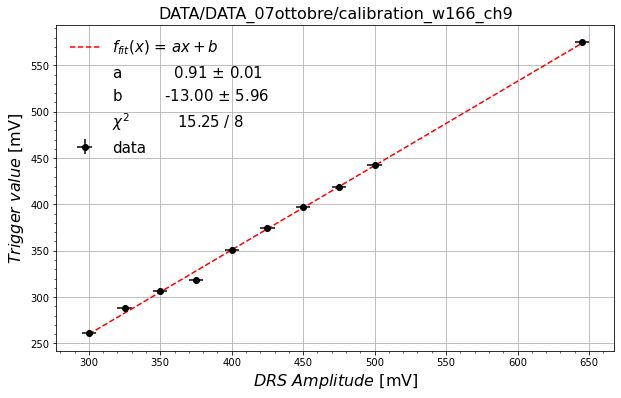

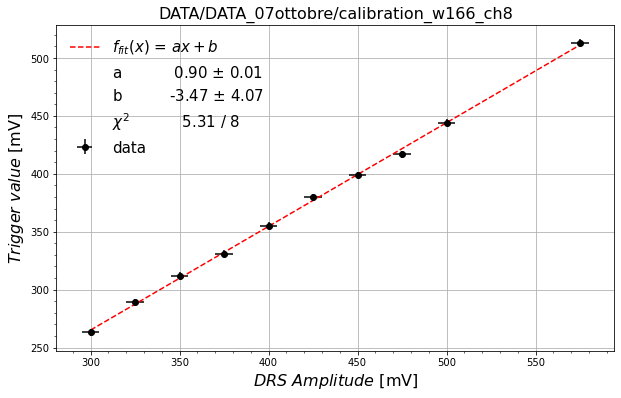

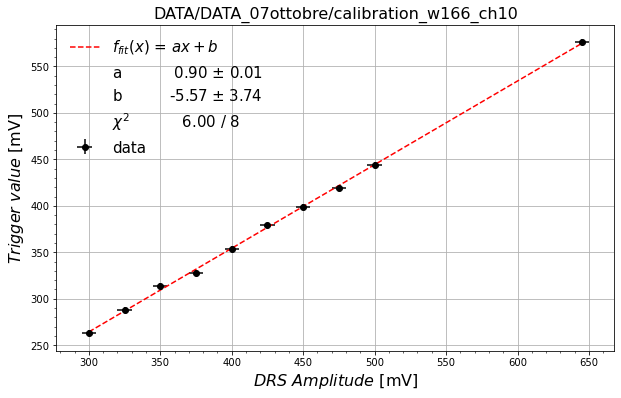

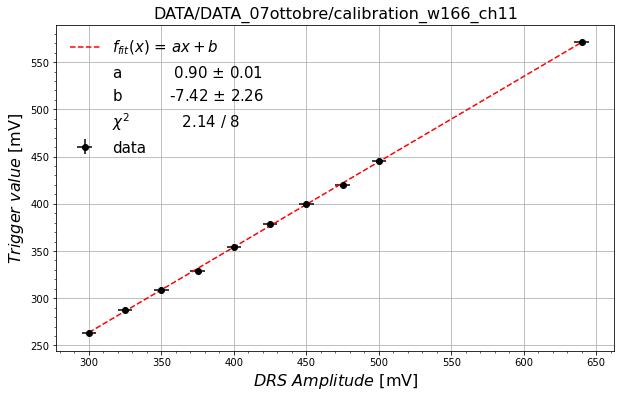

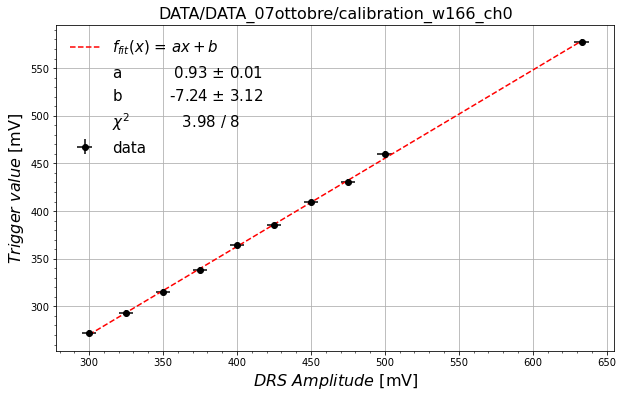

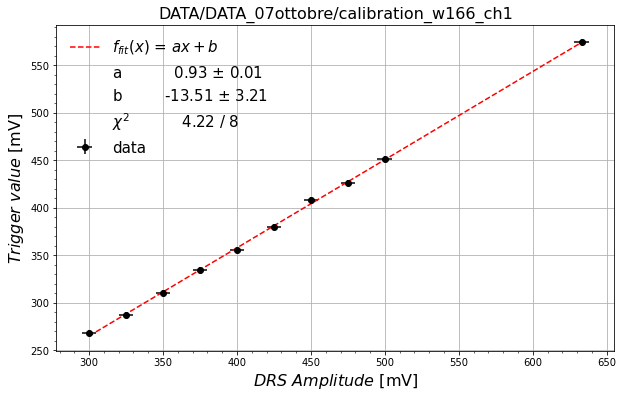

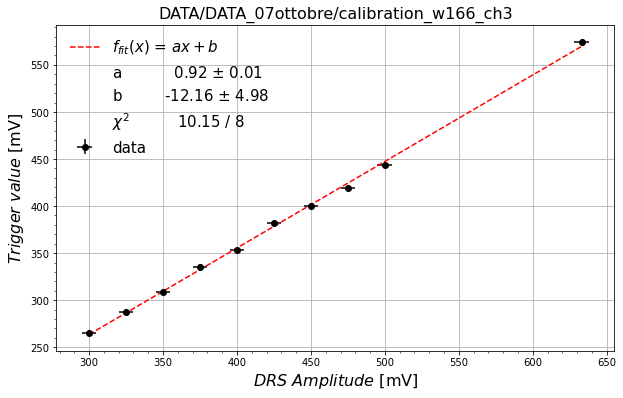

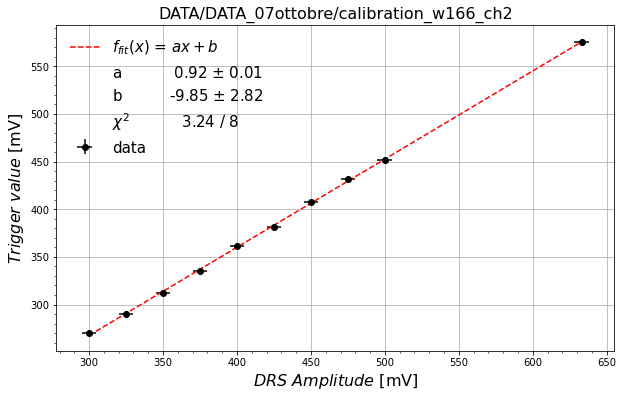

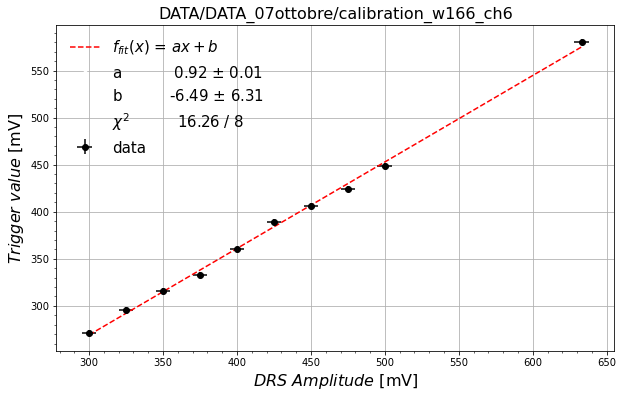

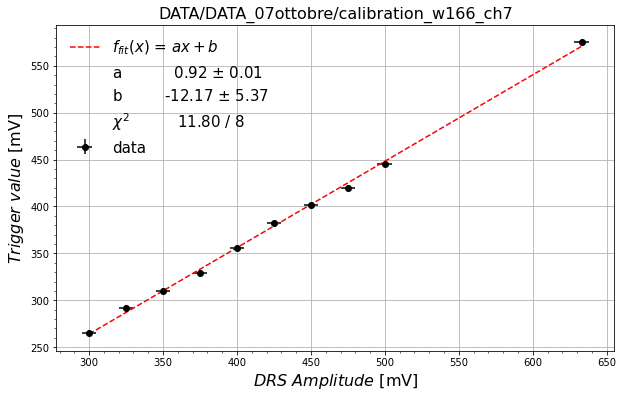

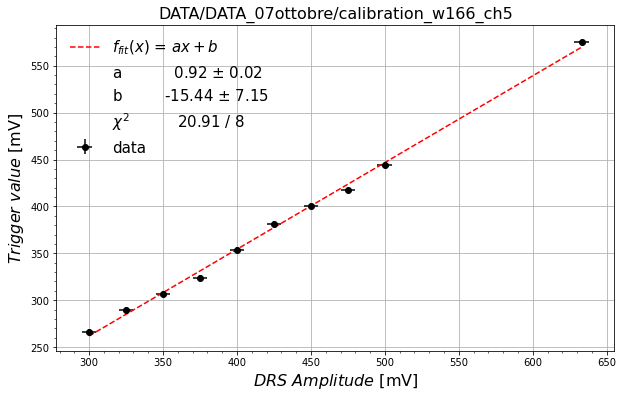

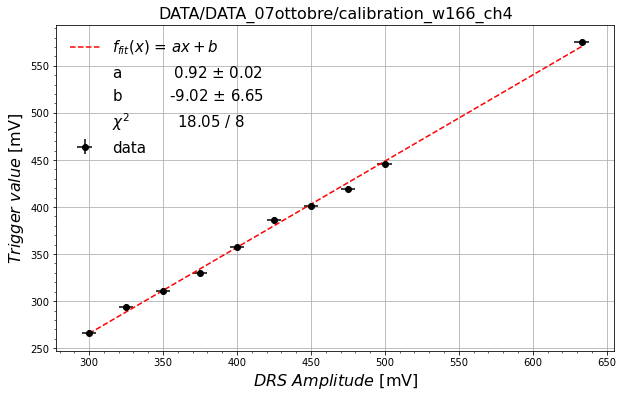

In [54]:
for file in glob.glob("DATA/DATA_07ottobre/*.txt"): # For all .txt file in the given folder.
    fit(file)